In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
pulse=np.load('lpulse.npy',allow_pickle=True)

In [4]:
pulse.shape

(24688, 1)

In [5]:
entropy=np.load('entropy.npy',allow_pickle=True)

In [6]:
entropy.shape

(24688, 4)

In [7]:
freq=np.load('fbands.npy',allow_pickle=True)

In [8]:
freq.shape

(24688, 35)

In [9]:
entreegs=np.load('entreeg.npy',allow_pickle=True)

In [10]:
minmaxvarray=np.load('minmaxvarray.npy',allow_pickle=True)

In [11]:
minmaxvarray.shape

(24688, 14)

In [12]:
MMD=np.load('MMD.npy',allow_pickle=True)

In [13]:
fmax=np.load('fmax.npy',allow_pickle=True)

In [14]:
RCpca=np.load('RCpca.npy')

In [15]:
X=np.concatenate((pulse,entropy,freq,entreegs,minmaxvarray,MMD,RCpca),axis=1)

In [16]:
X.shape

(24688, 72)

In [17]:
scaler = StandardScaler()
scaler.fit(X)
Xr=scaler.transform(X)

In [18]:
filename='y_train.csv'

ytrain=np.array(pd.read_csv(filename))
for i in range(5):
    print('occurence sleep stage',i,np.count_nonzero(ytrain[:,1]== i))
y=ytrain[:,1]

occurence sleep stage 0 3511
occurence sleep stage 1 1671
occurence sleep stage 2 9449
occurence sleep stage 3 5224
occurence sleep stage 4 4833


In [19]:
C=50000
SVM=SVC(C=C)

In [20]:
scores = cross_val_score(SVM, Xr[4000:5000], y[4000:5000], cv=5, scoring='f1_weighted',verbose=True,n_jobs=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [20]:
print('C=',C,scores,scores.mean(),scores.std())

C= 50000 [0.3648587  0.70841178 0.77859482 0.6410432  0.60580361] 0.6197424216331934 0.1405062725282595


In [23]:
print('C=',C,scores,scores.mean(),scores.std())

C= 50000 [0.37405769 0.68489249 0.76088557 0.60874226 0.57404875] 0.6005253517844007 0.13029914907616916


In [21]:
print('C=',C,scores,scores.mean(),scores.std())

C= 50000 [0.63934746 0.69754072 0.74293791 0.6361325  0.59521459] 0.6622346364344589 0.051877488615598204


In [29]:
print('C=',C,scores,scores.mean(),scores.std())

C= 1000 [0.17884925 0.5124782  0.56596027 0.54183018 0.50816888] 0.46145735425707396 0.1428517309435425


In [32]:
print('C=',C,scores,scores.mean(),scores.std())

C= 10000 [0.17375568 0.49951315 0.65178869 0.58020756 0.61457488] 0.503967993271753 0.1726020475541435


In [35]:
print('C=',C,scores,scores.mean(),scores.std())

C= 100000 [0.23199661 0.47403921 0.67106316 0.59727543 0.55608908] 0.5060926976211582 0.15111934099223281


In [38]:
print('C=',C,scores,scores.mean(),scores.std())

C= 1000000 [0.26947825 0.49380787 0.61649703 0.56010614 0.49563319] 0.4871044970302168 0.11794110776083604


In [41]:
print('C=',C,scores,scores.mean(),scores.std())

C= 50000 [0.20485812 0.45718204 0.65881895 0.6032643  0.56639739] 0.4981041582133803 0.16076052123028917


Train on every sample or the first 5000 doesn't change much the result but it takes much more time to use all of them.

0.01
5.623413251903491
3162.2776601683795
1778279.410038923
1000000000.0


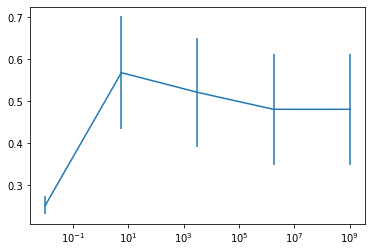

In [34]:
listC=np.logspace(-2,9,5)
Lmean=list()
Lstd=list()
for C in listC:
    print(C)
    SVM=SVC(C=C)
    scores = cross_val_score(SVM, Xr[1000:5000], y[1000:5000], cv=5,scoring='f1_weighted')
    Lmean.append(scores.mean())
    Lstd.append(scores.std())
plt.errorbar(listC,Lmean,yerr=Lstd)
plt.xscale('log')

Text(0.5, 0, 'C')

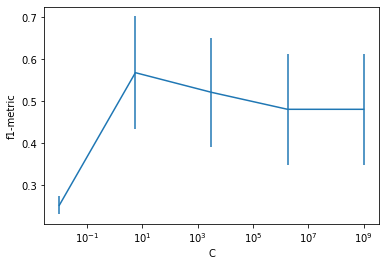

In [36]:
plt.errorbar(listC,Lmean,yerr=Lstd)
plt.xscale('log')
plt.ylabel('f1-metric')
plt.xlabel('C')
#Kfold=5 on samples between 1000:5000

1.0
3.72759372031494
13.894954943731374
51.7947467923121
193.06977288832496
719.6856730011514
2682.6957952797247
10000.0


Text(0.5, 0, 'C')

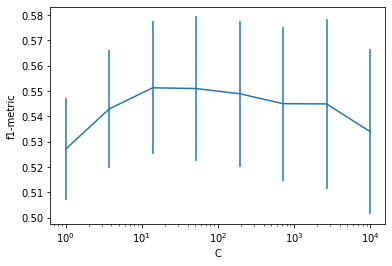

In [25]:
listC=np.logspace(0,4,8)
Lmean=list()
Lstd=list()
for C in listC:
    print(C)
    SVM=SVC(C=C)
    scores = cross_val_score(SVM, Xr, y, cv=5,scoring='f1_weighted')
    Lmean.append(scores.mean())
    Lstd.append(scores.std())
plt.errorbar(listC,Lmean,yerr=Lstd)
plt.xscale('log')
plt.ylabel('f1-metric')
plt.xlabel('C')

1.0
5.623413251903491
31.622776601683793
177.82794100389228
1000.0


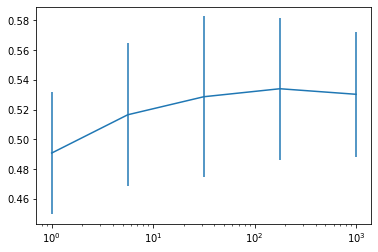

In [21]:
listC=np.logspace(0,3,5)
Lmean=list()
Lstd=list()
for C in listC:
    print(C)
    SVM=SVC(C=C)
    scores = cross_val_score(SVM, Xr[:15000], y[:15000], cv=5,scoring='f1_weighted')
    Lmean.append(scores.mean())
    Lstd.append(scores.std())
plt.errorbar(listC,Lmean,yerr=Lstd)
plt.xscale('log')

Text(0.5, 0, 'C')

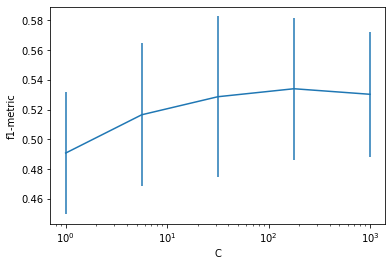

In [22]:
plt.errorbar(listC,Lmean,yerr=Lstd)
plt.xscale('log')
plt.ylabel('f1-metric')
plt.xlabel('C')
#Kfold=5 on samples between 0:15000

In [ ]:
plt.errorbar(listC[:-1],Lmean,yerr=Lstd)
plt.xscale('log')

In [ ]:
plt.plot(y[0:700])

In [ ]:
LG=LogisticRegression(C=1)
scores = cross_val_score(LG, X[200:700], y[200:700], cv=5, scoring='f1_weighted',verbose=True,n_jobs=1)

In [ ]:
scores

Results using Logistic regression are not much better.

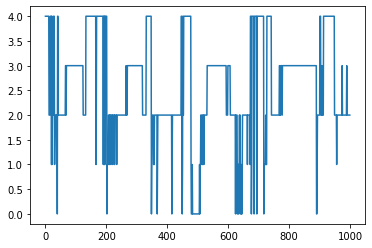

In [42]:
plt.plot(y[4000:5000])

In [ ]:
listC=np.logspace(-2,9,5)
Lmean=list()
Lstd=list()
for C in listC:
    print(C)
    LG=LogisticRegression(C=C,max_iter=1000000)
    scores = cross_val_score(LG, Xr[1000:5000], y[1000:5000], cv=5,scoring='f1_weighted')
    Lmean.append(scores.mean())
    Lstd.append(scores.std())
    print(Lmean,Lstd)
plt.errorbar(listC,Lmean,yerr=Lstd)
plt.ylabel('f1-metric')
plt.xlabel('C')
plt.xscale('log')

0.01
[0.4389159677706703] [0.1368892545253777]
5.623413251903491
[0.4389159677706703, 0.5113016207101335] [0.1368892545253777, 0.09592089844752398]
3162.2776601683795
[0.4389159677706703, 0.5113016207101335, 0.5467544735405101] [0.1368892545253777, 0.09592089844752398, 0.10330203978074855]
1778279.410038923


/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

[0.4389159677706703, 0.5113016207101335, 0.5467544735405101, 0.5958601942488542] [0.1368892545253777, 0.09592089844752398, 0.10330203978074855, 0.1202745594498682]
1000000000.0


/home/raphael/.virtualenvs/dreem/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
